In [6]:
import pandas as pd
import os

In [7]:
os.getcwd()

'/Users/Diven/Desktop/SMU/Python/Advanced Visualization'

In [8]:
movies = pd.read_csv('Movie-Ratings.csv')

In [9]:
len(movies)

559

In [10]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [12]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']

In [13]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [15]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


---


In [16]:
#Conversion f variables into categorical variables(YEAR)


In [17]:
movies.Year = movies.Year.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Film = movies.Film.astype('category')

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [19]:
#To see distinct categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [20]:
movies.describe()
#Year is removed from numerical and converted into category

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---


In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [22]:
#JOINT PLOT


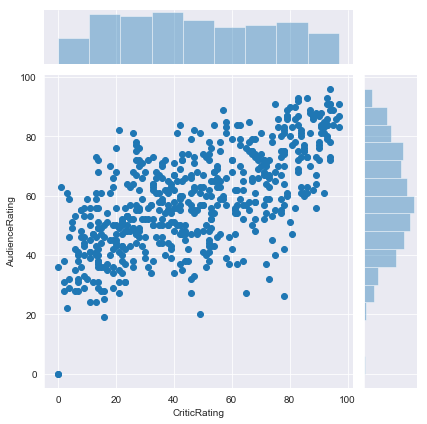

In [23]:
j=sns.jointplot(data=movies,x='CriticRating',y='AudienceRating')

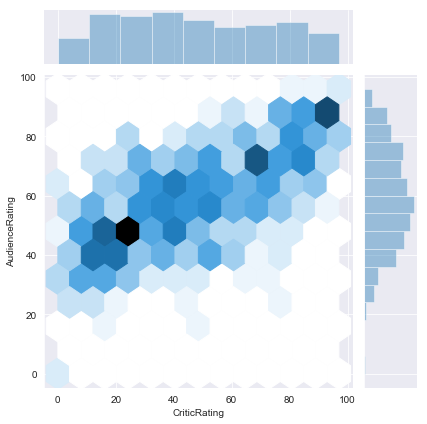

In [24]:
j=sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind="hex")

In [25]:
#<<<CHART-1

---

In [26]:
#HISTOGRAMS

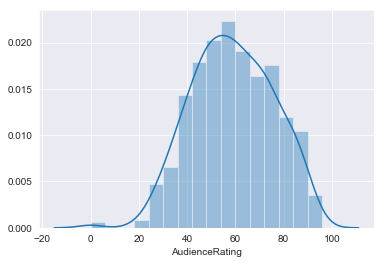

In [27]:
m1=sns.distplot(movies.AudienceRating)

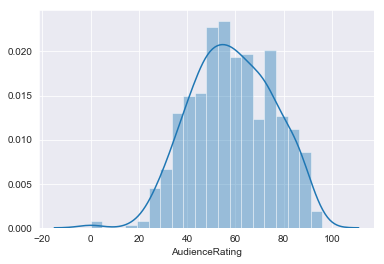

In [28]:

m1=sns.distplot(movies.AudienceRating,bins=20)

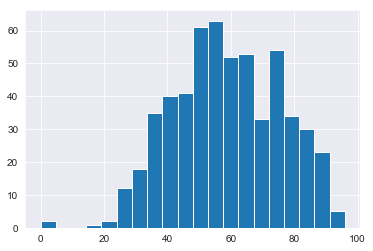

In [29]:
n1 = plt.hist(movies.AudienceRating,bins=20)

In [30]:
#<<<CHART 2

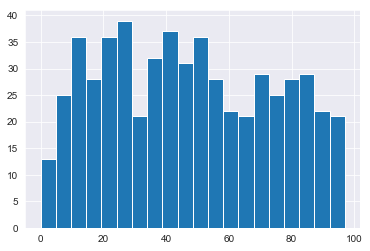

In [31]:
n1 = plt.hist(movies.CriticRating,bins=20)

In [32]:
#<<<CHART 3

In [33]:
#Stacked Histograms

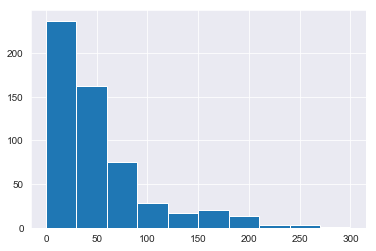

In [35]:
plt.hist(movies.BudgetMillions)
plt.show()



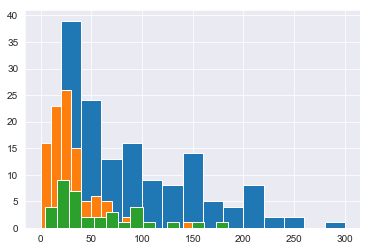

In [46]:
#movies[movies.Genre == 'Drama'].BudgetMillions
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions,bins=15)
plt.show()

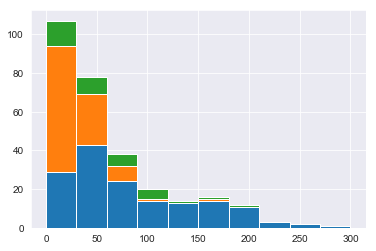

In [49]:
#[movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, movies[movies.Genre == 'Thriller'].BudgetMillions]


plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,
          movies[movies.Genre == 'Drama'].BudgetMillions,
          movies[movies.Genre == 'Thriller'].BudgetMillions],bins=10,stacked=True)
plt.show()

In [52]:
#movies.Genre.cat.categories
for gen in movies.Genre.cat.categories:
    print (gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


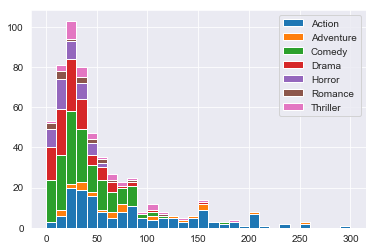

In [60]:
list1=[]
mylabels=[]
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
#print(list1)

plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylabels)
plt.legend()
plt.show()


In [61]:
#<<CHART 4

---


In [62]:
#KDE PLOT


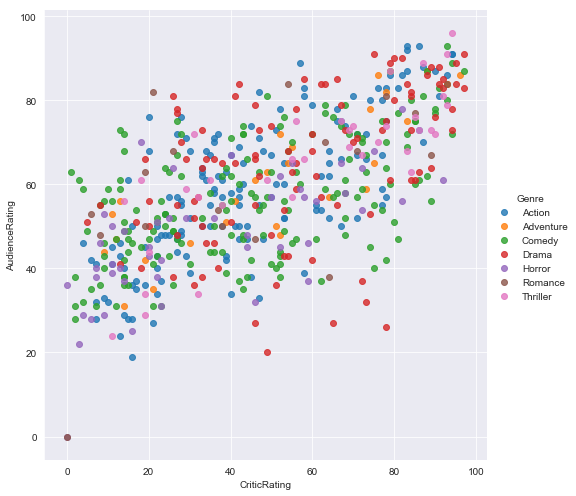

In [66]:
vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',fit_reg=False,hue='Genre',size=7,aspect=1)

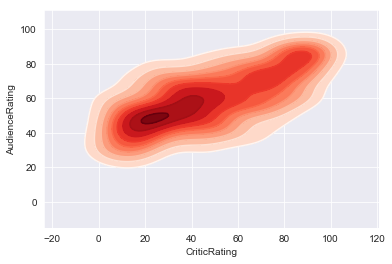

In [74]:
#KERNEL DENSITY ESTIMATE
#k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Reds')
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds')

---


In [75]:
#WORKING WITH SUBPLOTS


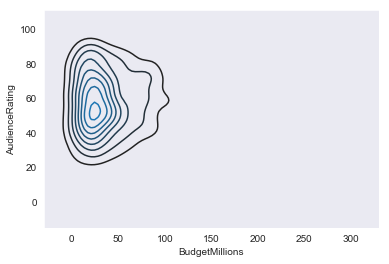

In [77]:
sns.set_style("dark")
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

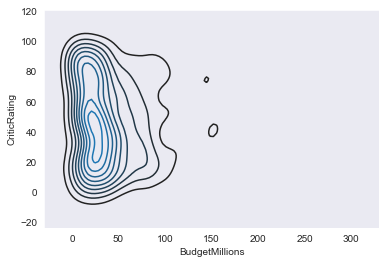

In [84]:
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

[(-20, 160)]

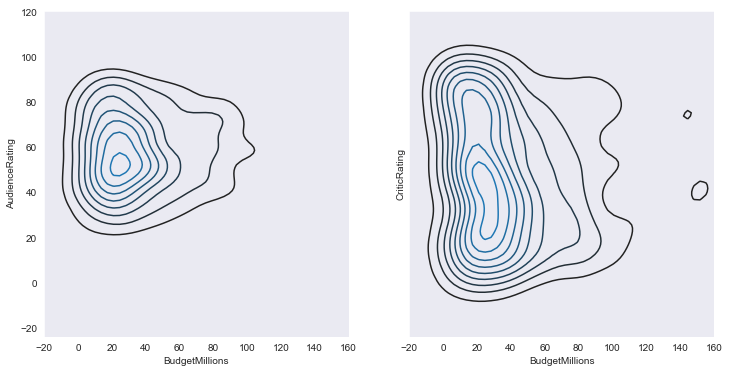

In [89]:
f,axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[1])
k1.set(xlim=(-20,160))

---

In [90]:
#VIOLIN PLOTS

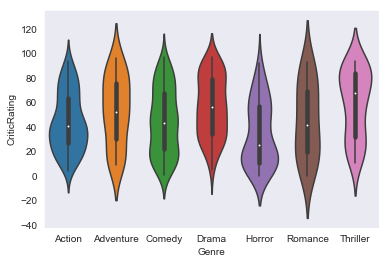

In [91]:
z=sns.violinplot(data=movies,x='Genre',y='CriticRating')

---

In [92]:
#FACET GRID


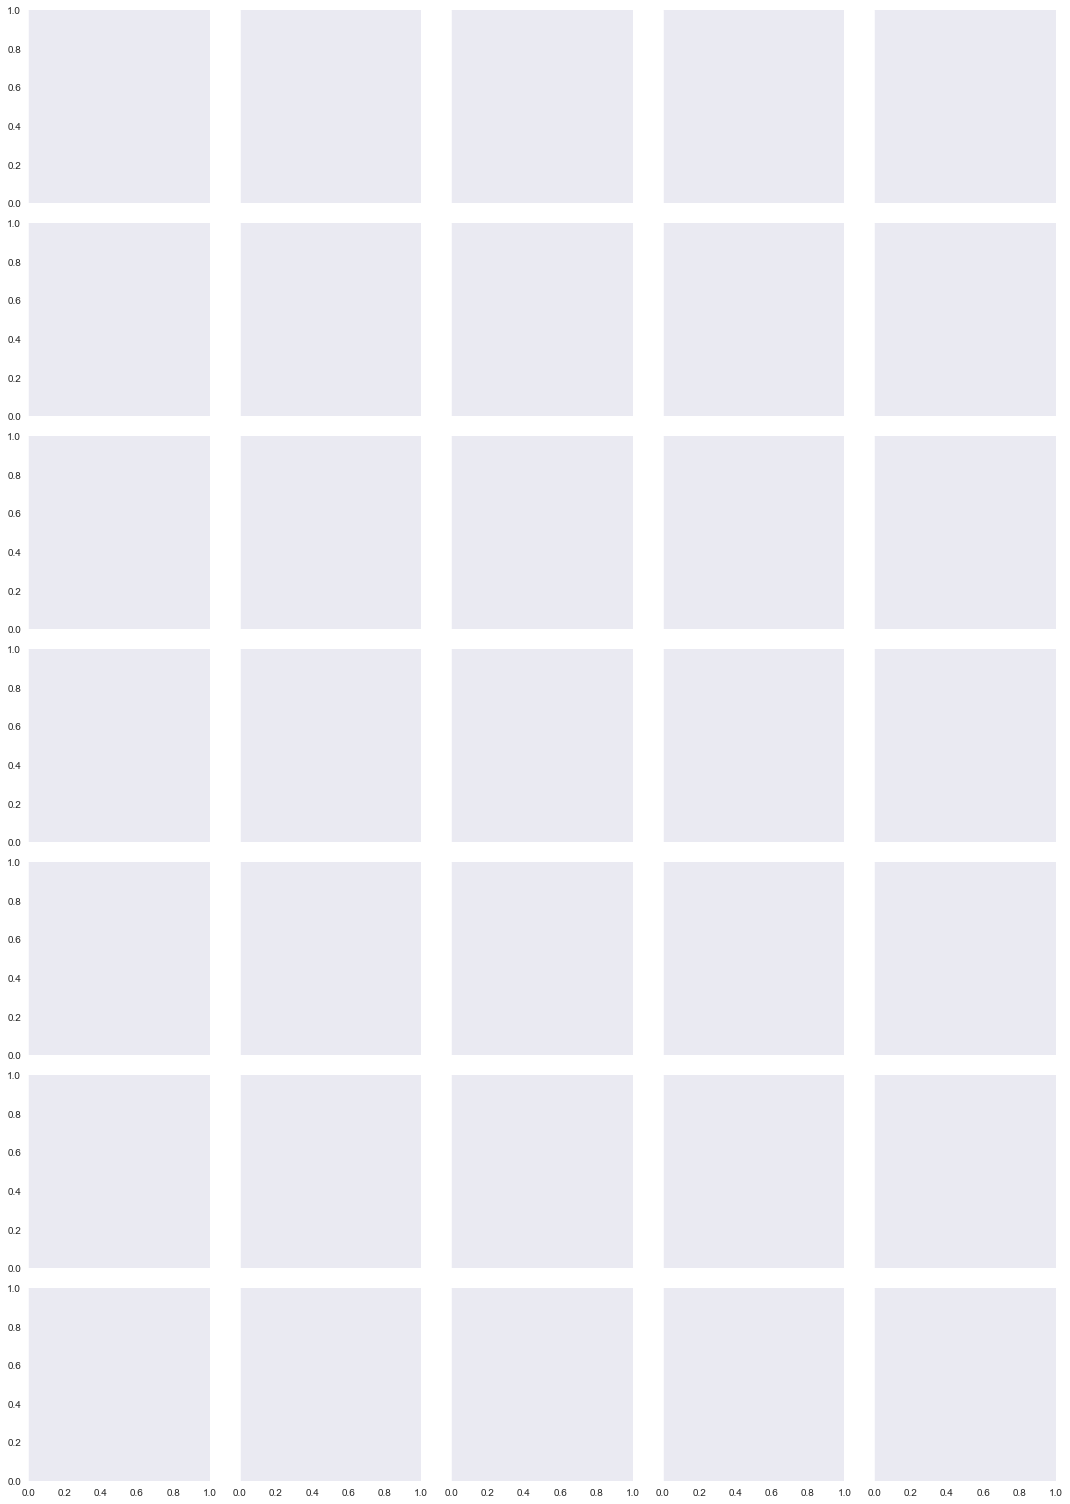

In [95]:
g=sns.FacetGrid(movies,row='Genre', col='Year', hue='Genre')

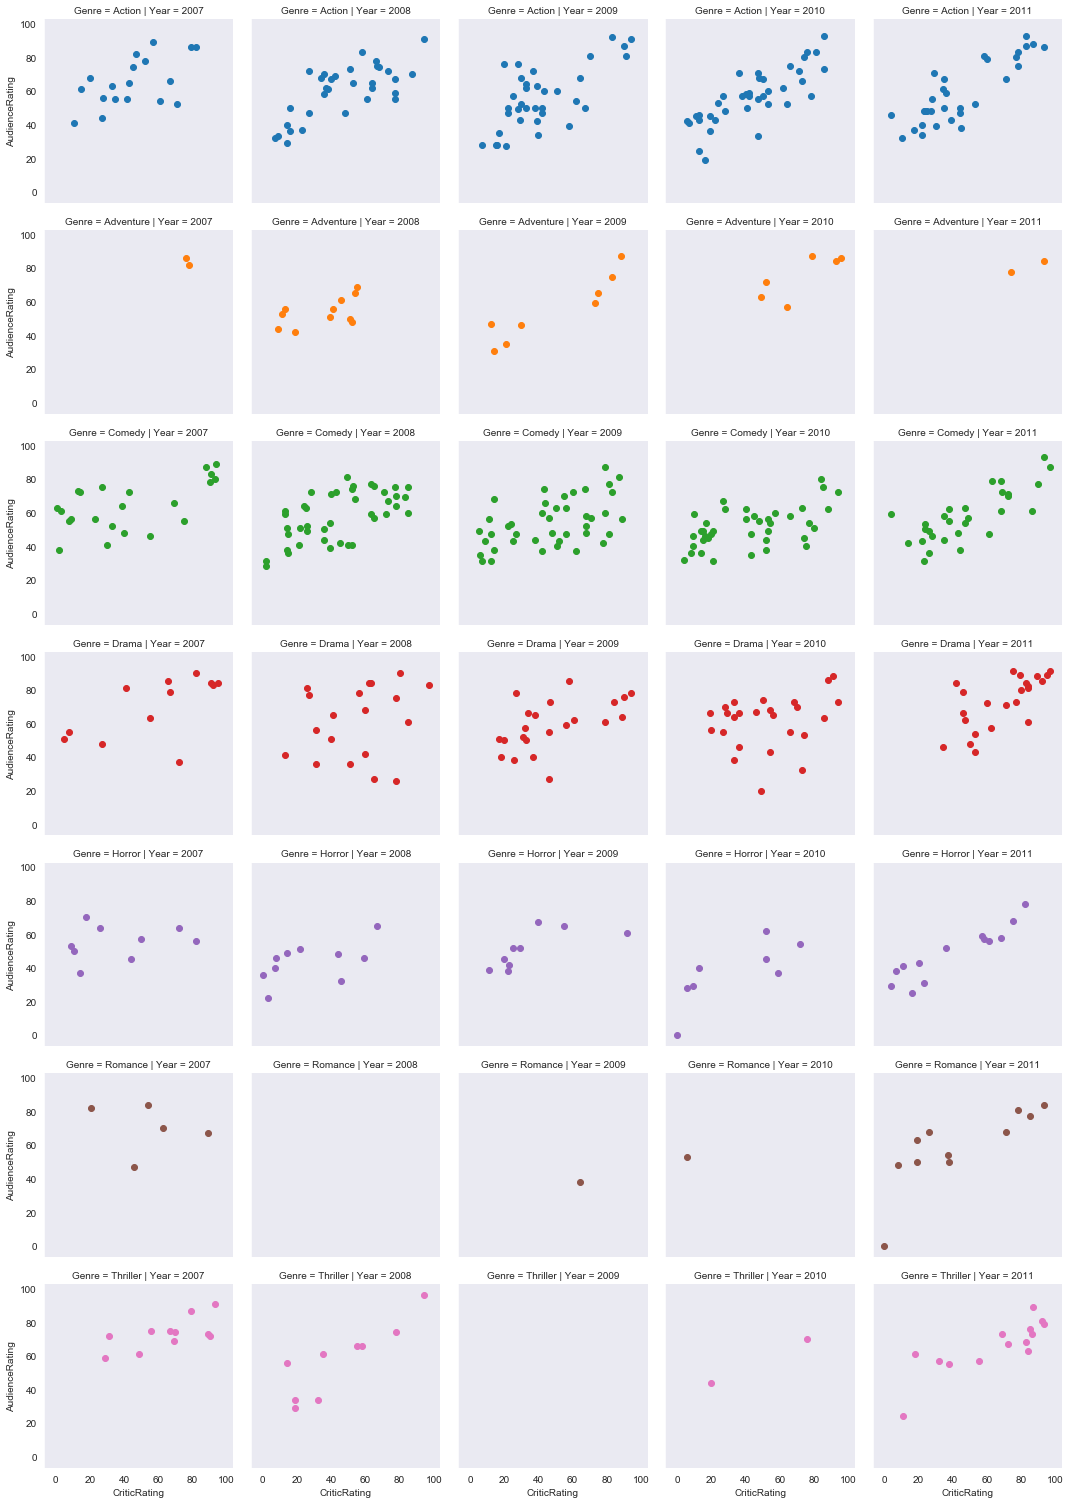

In [96]:
g=sns.FacetGrid(movies,row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating','AudienceRating')

In [97]:
#Can be done with any type of chart Example- Histograms

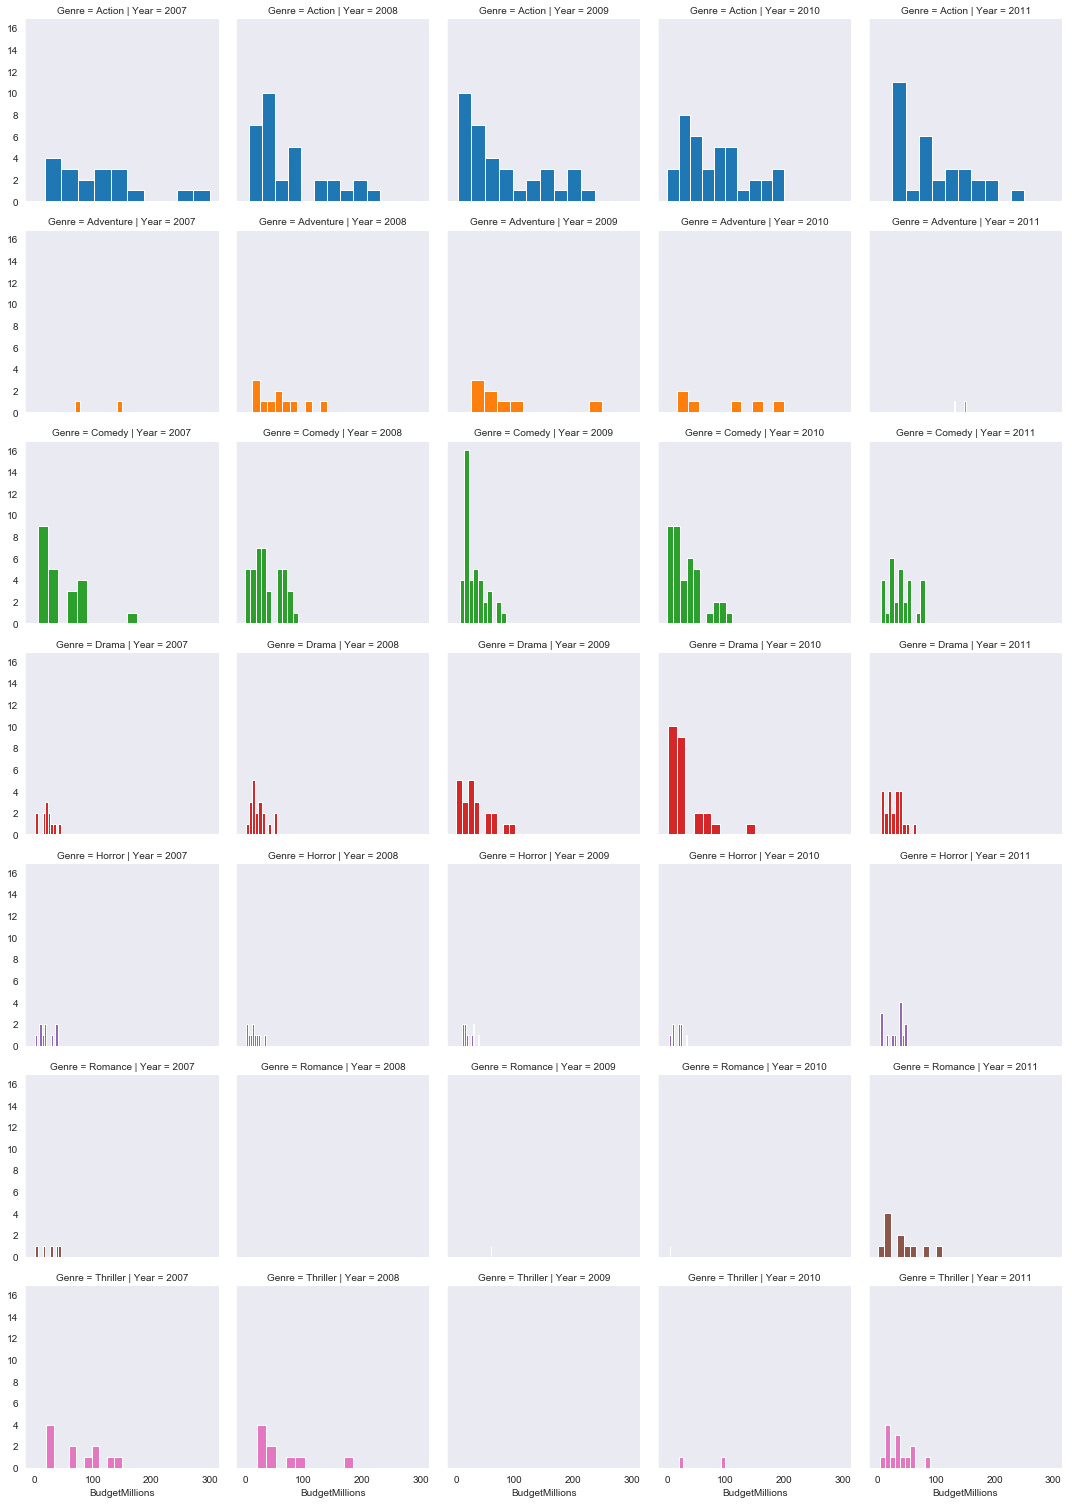

In [98]:
g=sns.FacetGrid(movies,row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

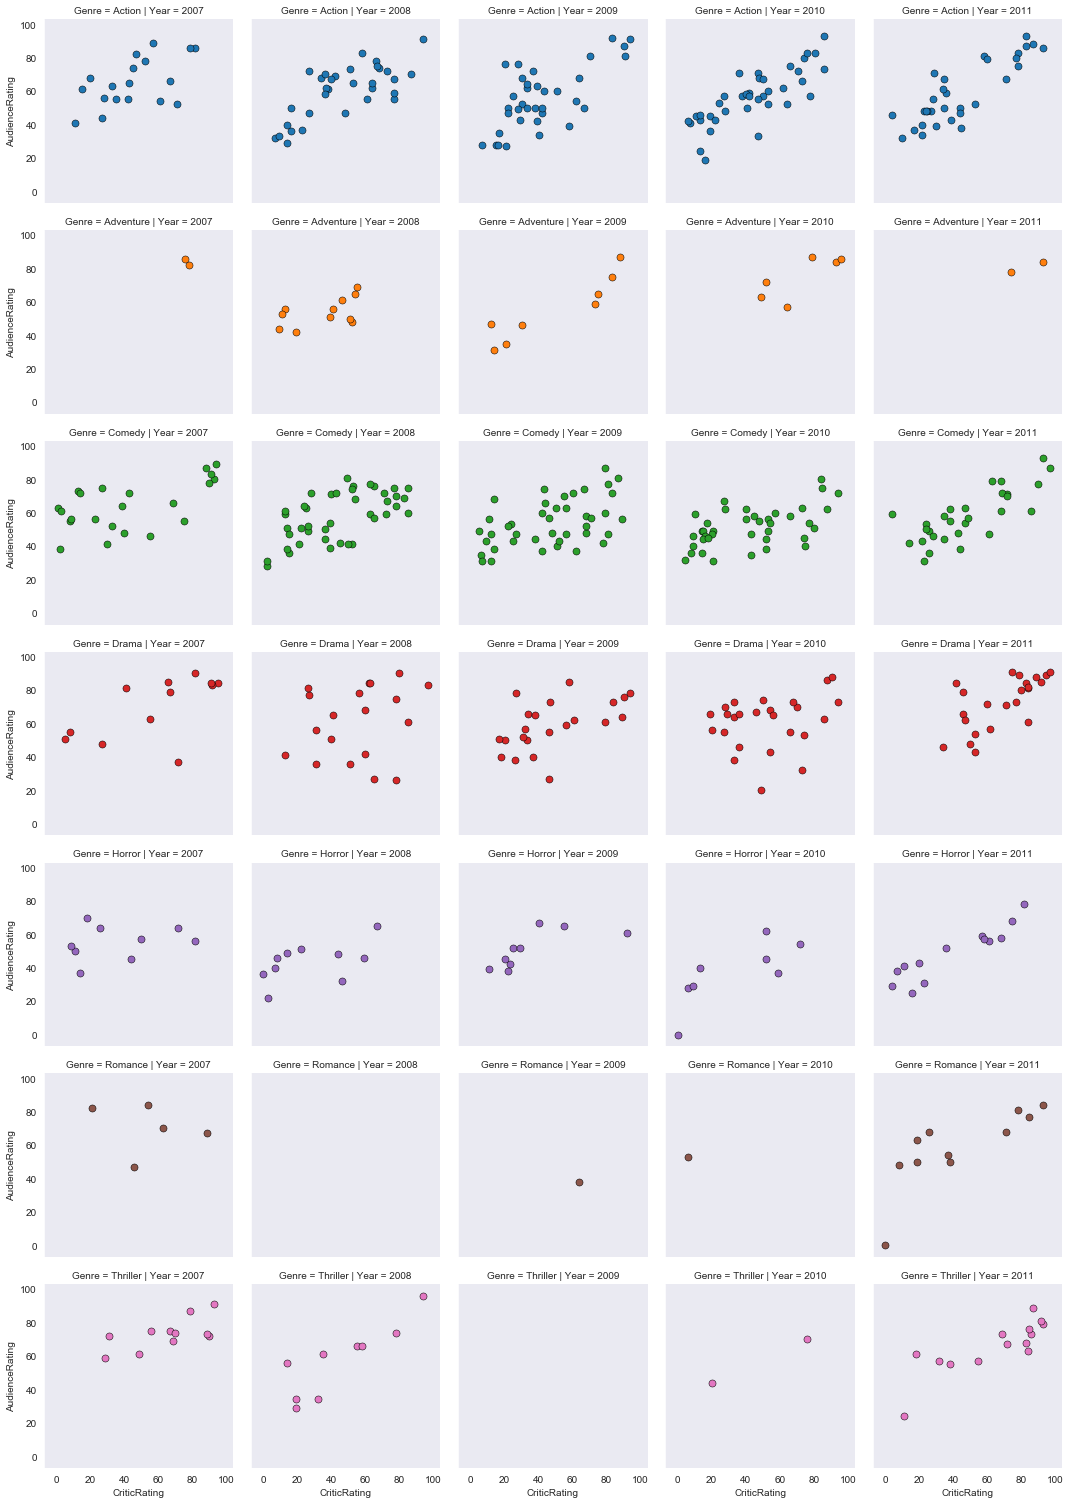

In [100]:
#Back to scatter plots
g=sns.FacetGrid(movies,row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating','AudienceRating',**kws)

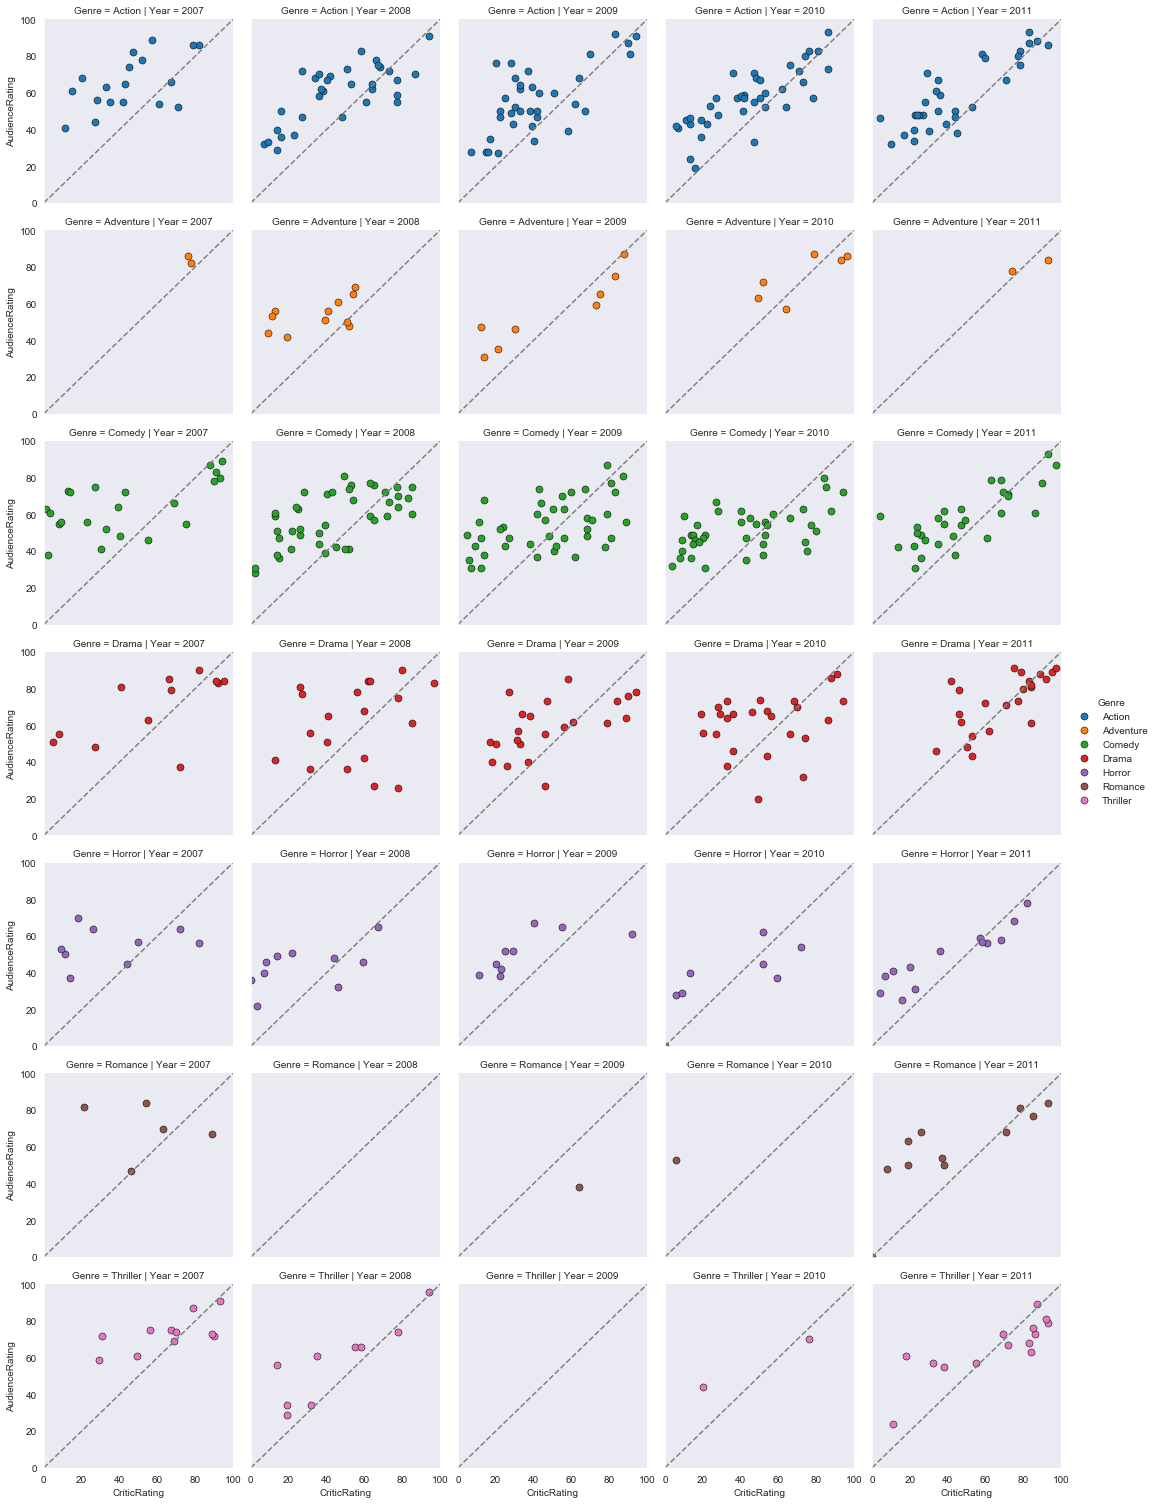

In [105]:
#CONTROLLING AXES AND ADDING DIGONALS
g=sns.FacetGrid(movies,row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating','AudienceRating',**kws)
g.set(xlim=(0,100),ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c="gray",ls="--")

g.add_legend()

In [106]:
#<<CHART 5

---


---

---
Dashboards
---

[(-20, 160)]

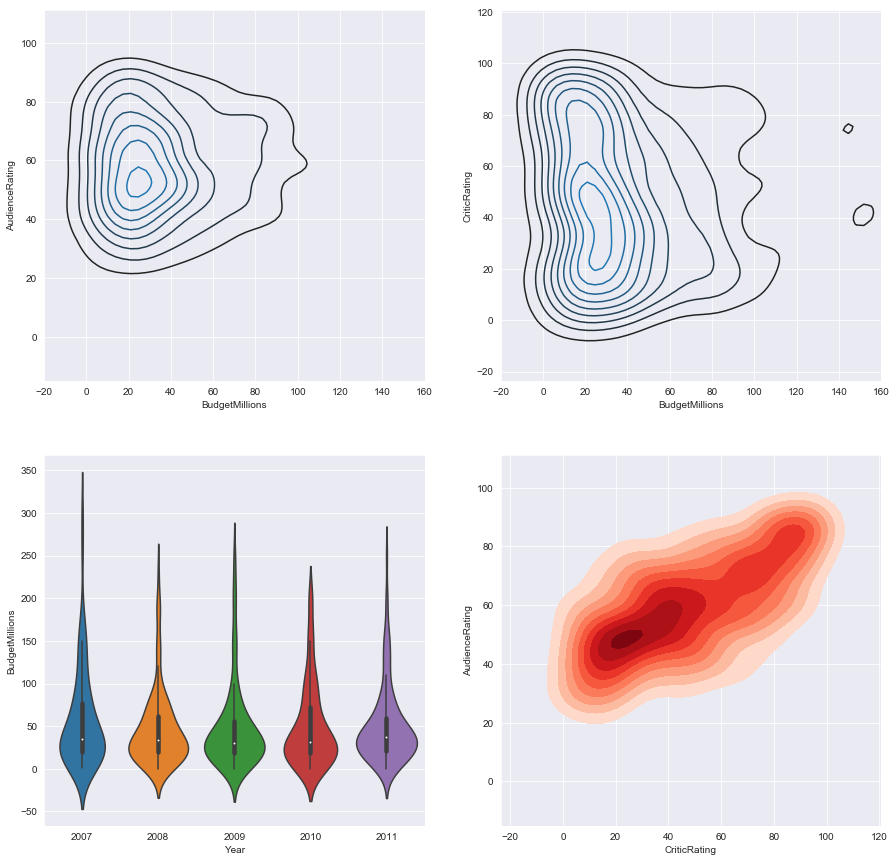

In [158]:
#f,axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)

sns.set_style("darkgrid")
f,axes = plt.subplots(2,2,figsize=(15,15))
#PLOT[0,0]
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0,0])
#PLOT[0,1]
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,1])
#PLOT[1,0]
k3=sns.violinplot(data=movies,x='Year',y='BudgetMillions',ax=axes[1,0])
#PLOT[0,2]
k4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds',ax=axes[1,1])

#AXIS
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))



#HISTOGRAMS

#ax=axes[2,0].hist(movies.AudienceRating,bins=20)
#ax=axes[2,1].hist([movies[movies.Genre == 'Action'].BudgetMillions,
          #movies[movies.Genre == 'Drama'].BudgetMillions,
          #movies[movies.Genre == 'Thriller'].BudgetMillions],bins=10,stacked=True)

#ERRORS
#vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',fit_reg=False,hue='Genre',size=7,aspect=1,ax=axes[2,])
#k5=sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind="hex",ax=axes[2,1])

---
How to make it look better
---

[(-20, 160)]

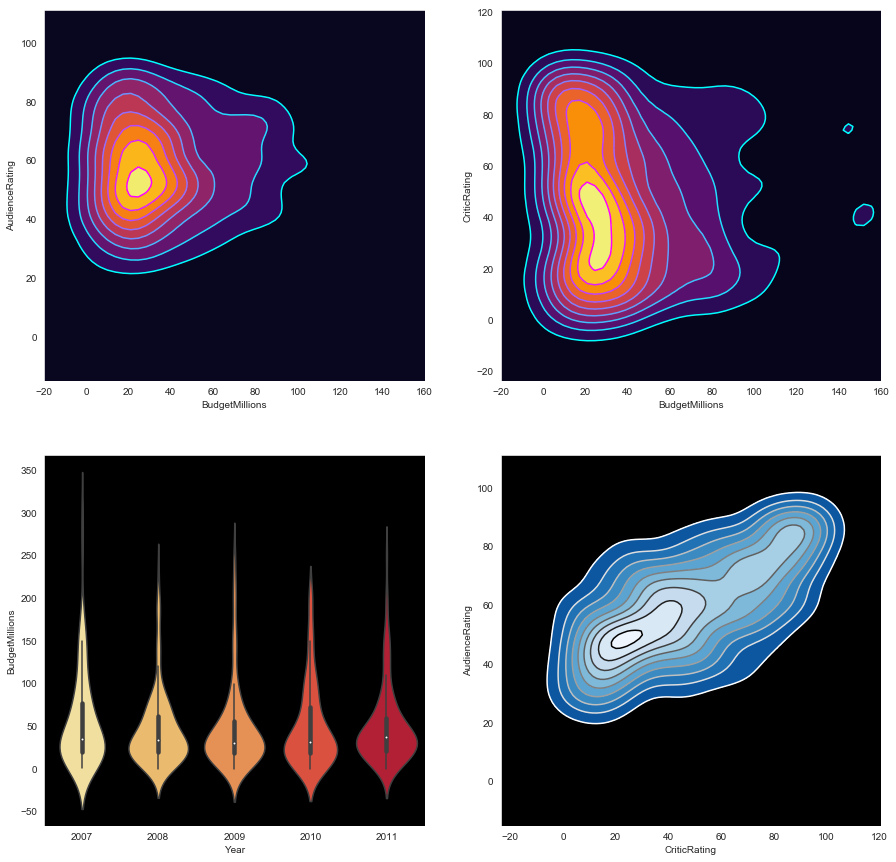

In [154]:
#f,axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
#white,white_grid,dark,dark_grip,ticks
sns.set_style("dark",{"axes.facecolor":"black"})
f,axes = plt.subplots(2,2,figsize=(15,15))
#PLOT[0,0]
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,shade=True,shade_lowest=True,cmap='inferno',ax=axes[0,0])
k1b=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,cmap='cool',ax=axes[0,0])
#PLOT[0,1]
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,shade=True,shade_lowest=True,cmap='inferno',ax=axes[0,1])
k2b=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,cmap='cool',ax=axes[0,1])
#PLOT[1,0]
k3=sns.violinplot(data=movies,x='Year',y='BudgetMillions',palette='YlOrRd',ax=axes[1,0])
#PLOT[1,1]
k4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Blues_r',ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='gist_gray_r',ax=axes[1,1])

#AXIS
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))



#HISTOGRAMS

#ax=axes[2,0].hist(movies.AudienceRating,bins=20)
#ax=axes[2,1].hist([movies[movies.Genre == 'Action'].BudgetMillions,
         # movies[movies.Genre == 'Drama'].BudgetMillions,
          #movies[movies.Genre == 'Thriller'].BudgetMillions],bins=10,stacked=True)

#ERRORS
#vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',fit_reg=False,hue='Genre',size=7,aspect=1,ax=axes[2,])
#k5=sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind="hex",ax=axes[2,1])

---
Finishing Touches
---

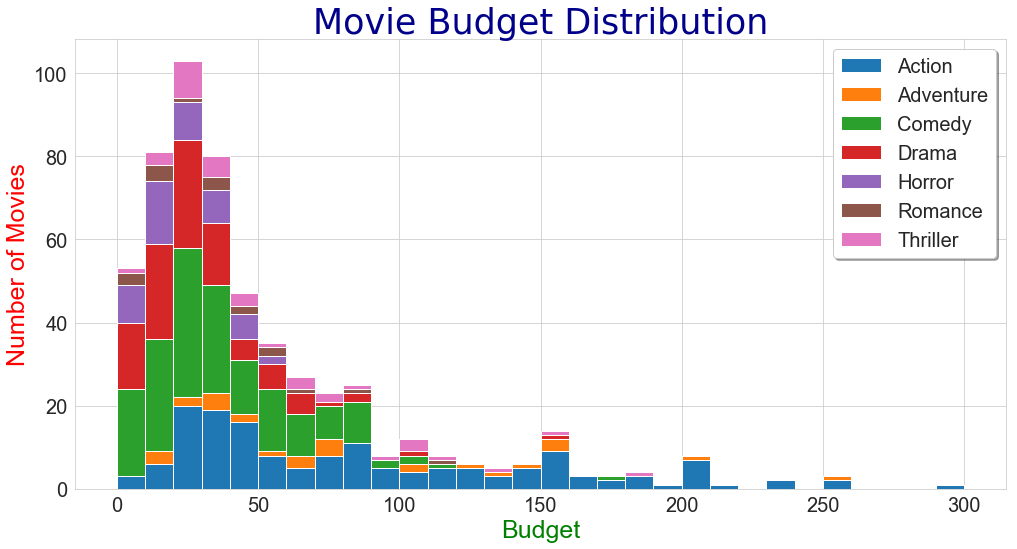

In [188]:
list1=[]
mylabels=[]
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
#print(list1)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(16.7,8.27)
h = plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylabels)
plt.title("Movie Budget Distribution",fontsize=35,color="DarkBlue",fontname="Console")
plt.ylabel("Number of Movies",fontsize=25,color="Red")
plt.xlabel("Budget",fontsize=25,color="Green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True,fancybox=True,shadow=True,framealpha=1,prop={'size':20})
plt.show()
